<a href="https://colab.research.google.com/github/skdding3/Basic_statistic/blob/main/%EA%B9%80%EC%84%A0%EA%B8%B0/Stats_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

확률 밀도 함수 (Probability Density Function),누적 분포 함수 (Cumulative Distribution Function)

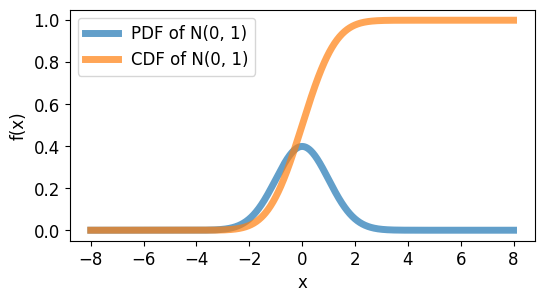

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

np.random.seed(0)

plt.style.use('default')
plt.rcParams['figure.figsize'] = (6, 3)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 5

mu = 0.0
sigma = 1.0

x = np.linspace(-8, 8, 1000)
y = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x-mu)**2 / (2 * sigma**2))
y_cum = 0.5 * (1 + erf((x - mu)/(np.sqrt(2 * sigma**2))))

plt.plot(x, y, alpha=0.7, label='PDF of N(0, 1)')
plt.plot(x, y_cum, alpha=0.7, label='CDF of N(0, 1)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(loc='upper left')
plt.show()

qq plot

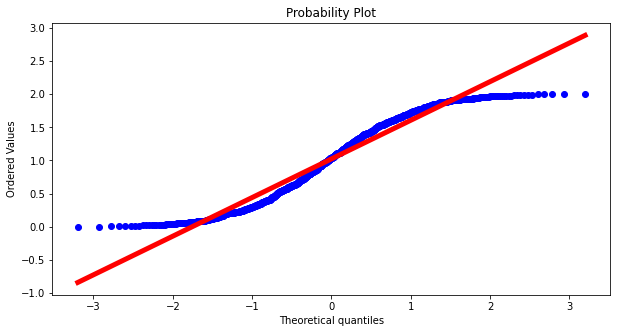

In [6]:
import scipy.stats as stats

rand = np.random.uniform(low=0, high=2, size=1000)

plt.figure(figsize = (10,5))

stats.probplot(rand, dist=stats.norm, plot=plt)
plt.show()

t 분포

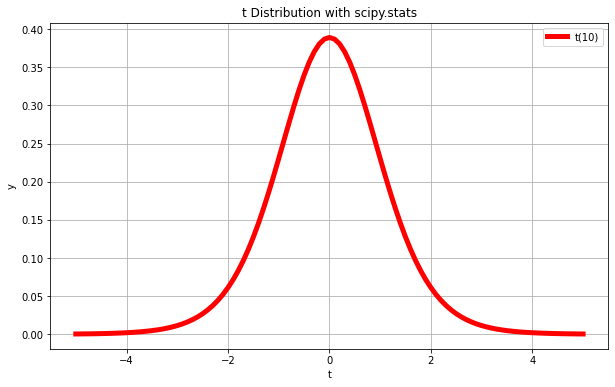

In [9]:
t = np.linspace(-5, 5, 101)   # t 정의  

y1 = stats.t(10).pdf(t)       

plt.figure(figsize=(10, 6))          # 플롯 사이즈 지정
plt.plot(t, y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성          
plt.xlabel("t")                      # x축 레이블 지정
plt.ylabel("y")                      # y축 레이블 지정
plt.grid()                           # 플롯에 격자 보이기
plt.title("t Distribution with scipy.stats")     # 타이틀 표시
plt.legend(["t(10)"])                # 범례 표시
plt.show()                           # 플롯 보이기

이항분포

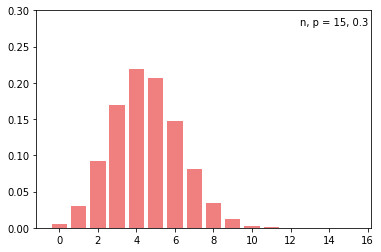

In [10]:
from math import factorial

# Probability density of the binomial distribution
def bin_dist(k, n, p):
    nck = factorial(n) / (factorial(k) * factorial(n - k))
    pd = nck * p**k * (1-p)**(n-k)
    return pd


x = np.arange(16)
pd1 = np.array([bin_dist(k, 15, 0.3) for k in range(16)])
plt.ylim(0, 0.3)
plt.text(12.5, 0.28, 'n, p = 15, 0.3')
plt.bar(x, pd1, color='lightcoral')
plt.show()

카이제곱 검정

사람별로 맥주, 소주의 선호도도 차이에 대하여 카이제곱 검정을 해보자.

In [18]:
import pandas as pd
from pandas import DataFrame

xf = [269, 83, 215] 
xm = [155, 57, 181] 
x = DataFrame([xf, xm], 
              columns = ['sunki','jungsuk','tkyu'], 
              index = ['beer','soju']) 

x

,sunki,jungsuk,tkyu
beer,269,83,215
soju,155,57,181


In [19]:
from scipy.stats import chi2_contingency 
chi_2, p, dof, expected = chi2_contingency([xf, xm]) 
msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}' 

print(msg.format(chi_2, p, dof)) 
print(expected)

Test Statistic: 7.094264414804222
p-value: 0.028807134195296135
Degree of Freedom: 2
[[250.425   82.6875 233.8875]
 [173.575   57.3125 162.1125]]


F 분포

In [20]:
def normal(inp): #카이제곱 리스트 연산 1000번 시행
    result = []
    for i in range(1,1001):
        tmp = np.random.normal(size = inp)
        dummy = 0
        for i in range(inp):
            tmp2  = tmp[i] ** 2
            dummy += tmp2
        result.append(dummy)
    return result

In [21]:
def f(inp1, inp2): # f값 연산 함수
    result1 = np.array(normal(inp1)) / inp1
    result2 = np.array(normal(inp2)) / inp2
    result = result1 / result2
    return result

In [22]:
def make_group(inp): #데이터 프레임화
    num_0 = 0
    num_1 = 0
    num_2 = 0
    num_3 = 0
    num_4 = 0
    num_5 = 0
    num_6 = 0
    num_7 = 0
    num_8 = 0
    num_9 = 0
    num_10 = 0
    num_11 = 0
    num_12 = 0
    num_13 = 0
    num_14 = 0
    num_15 = 0
    num_16 = 0
    num_17 = 0
    num_18 = 0
    num_19 = 0
    num_20 = 0
    for i in inp:
        if i >= 20:
            num_20 += 1
        elif i >= 19:
            num_19 += 1
        elif i >= 18:
            num_18 += 1
        elif i >= 17:
            num_17 += 1
        elif i >= 16:
            num_16 += 1
        elif i >= 15:
            num_15 += 1
        elif i >= 14:
            num_14 += 1
        elif i >= 13:
            num_13 += 1
        elif i >= 12:
            num_12 += 1
        elif i >= 11:
            num_11 += 1
        elif i >= 10:
            num_10 += 1
        elif i >= 9:
            num_9 += 1
        elif i >= 8:
            num_8 += 1
        elif i >= 7:
            num_7 += 1
        elif i >= 6:
            num_6 += 1
        elif i >= 5:
            num_5 += 1
        elif i >= 4:
            num_4 += 1
        elif i >= 3:
            num_3 += 1
        elif i >= 2:
            num_2 += 1
        elif i >= 1:
            num_1 += 1
        elif i >= 0:
            num_0 += 1
    result = pd.DataFrame({
        'standard' : ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', 'over20'],
        'result' : [num_0, num_1, num_2, num_3, num_4, num_5, num_6, num_7, num_8, num_9, num_10,
                   num_11, num_12, num_13, num_14, num_15, num_16, num_17, num_18, num_19, num_20]
    })
    return result

<BarContainer object of 21 artists>

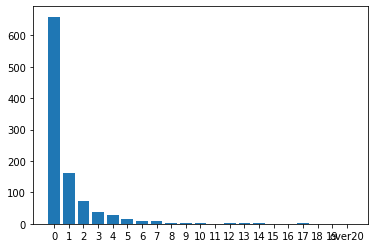

In [23]:
result = make_group(f(1, 10))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

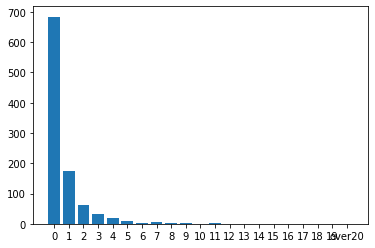

In [24]:
result = make_group(f(1, 1000))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

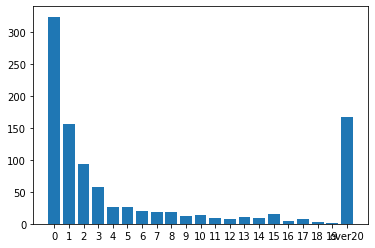

In [25]:
result = make_group(f(10, 1))
plt.bar(result['standard'], result['result'])

<BarContainer object of 21 artists>

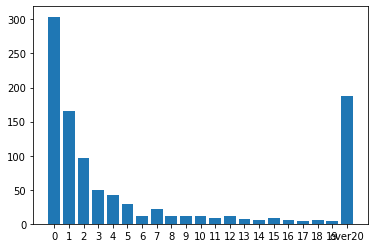

In [26]:
result = make_group(f(1000, 1))
plt.bar(result['standard'], result['result'])